### Get Distance metric

##### Chi-squared distance is used to check the similarity among two fecture vectors. Metric Rank-n and MSE info is returned

In [1]:
import numpy as np 
import csv
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

### Test

In [53]:
    data = pd.read_csv("calculated_features/awe-awet_lpq.csv")
    X = data.drop('class', axis=1)  
    y = data['class']
    X_np = X.values
    y_np = y.values
    s = (len(X_np), len(X_np), 2)
    y_pred = np.zeros(s)
    print(len(X_np))
    # Get distances matrix
    for i in range(len(X_np)):
        #minimun = 1e+10;    
        for j in range (len(X_np)):
            dis = chiSquared(X_np[i], X_np[j])
            #if dis < minimun and i != j:
            #minimun = res
            y_pred[i][j] = [dis, y[j]] 

1000


In [54]:
# Order matrix acordance to distance
    for i in range(len(y_pred)):
        b = y_pred[i]
        y_pred[i] = b[b[:,0].argsort()] 

In [55]:
    rank = 5
    count = 0
    # Get Rank counting
    rankbins = np.zeros(rank+1)
    for i in range (len(y_pred)):        
        for j in range (len(y_pred)):
            if y_pred[i][j][0] == 0.0: #if distance is 0, it's the same vector                
                continue
            else:
                if j > rank: #we are interested in evaluate only the rank-n                    
                    rankbins[rank] += 1
                    break;
                else: 
                    if y[i] == y_pred[i][j][1]:                                                 
                        rankbins[j] += 1                        
                        break                    

In [56]:
rankbins, count, i, j

(array([   0.,  389.,   94.,   52.,   32.,  433.]), 0, 999, 6)

### Getting Rank1 metric

In [2]:
def chiSquared(a,b):
    res = np.sqrt(0.5*np.sum((a-b)**2/(a+b+1e-6)))
    return res

def chiSquared2(a,b):
    #res = np.sqrt(0.5*np.sum((a-b)**2/(a+b+1e-6)))
    return 0.5*np.sum((a-b)**2/(a+b+1e-6))

#Input: csvfile // Output: rankbins
def getMetrics(csvfilename, rank):
    data = pd.read_csv(csvfilename)
    Xdf = data.drop('class', axis=1)  
    ydf = data['class']
    X = Xdf.values
    y = ydf.values
    s = (len(X), len(X), 2)
    y_pred = np.zeros(s)
    
    # Get distances matrix
    for i in range(len(X)):        
        for j in range (len(X)):
            dis = chiSquared(X[i], X[j])
            y_pred[i][j] = [dis, y[j]] 
            
    # Order matrix acording to distance
    for i in range(len(y_pred)):
        b = y_pred[i]
        y_pred[i] = b[b[:,0].argsort()] 
        
    # Get Rank counting
    rankbins = np.zeros(rank+1)
    for i in range (len(y_pred)):        
        for j in range (len(y_pred)):
            if y_pred[i][j][0] == 0.0: #if distance is 0, it's the same vector                
                continue
            else:
                if j > rank: #we are interested in evaluate only the rank-n                    
                    rankbins[rank] += 1
                    break;
                else: 
                    if y[i] == y_pred[i][j][1]:                                                 
                        rankbins[j] += 1                        
                        break 
    
    rank_rate = rankbins/sum(rankbins)                
    return rank_rate

In [ ]:
rate_lbp = getMetrics("calculated_features/awe-awet_lbp.csv")
rate_lbp[1]

In [ ]:
rate_bsif = getMetrics("calculated_features/awe-awet_bsif.csv")
rate_bsif[1]

In [ ]:
rate_lpq = getMetrics("calculated_features/awe-awet_lpq.csv")
rate_lpq[1]

In [ ]:
rate_rilpq = getMetrics("calculated_features/awe-awet_rilpq.csv")
rate_rilpq[1]

In [ ]:
rate_poem = getMetrics("calculated_features/awe-awet_poem.csv")
rate_poem[1]

In [ ]:
rate_hog = getMetrics("calculated_features/awe-awet_hog.csv")
rate_hog[1]

In [ ]:
rate_dsift = getMetrics("calculated_features/awe-awet_dsift.csv")
rate_dsift[1]

### Plotting results

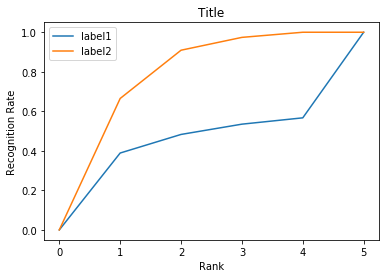

In [76]:
plt.figure()
line_hog, = plt.plot(np.cumsum(rate_hog))
line_lbp, = plt.plot(np.cumsum(rate_lbp))
line_lpq, = plt.plot(np.cumsum(rate_lpq))
line_rilpq, = plt.plot(np.cumsum(rate_rilpq))
line_bsif, = plt.plot(np.cumsum(rate_bsif))
line_poem, = plt.plot(np.cumsum(rate_poem))
line_dsift, = plt.plot(np.cumsum(rate_dsift))
plt.legend((line_hog, line_lbp, line_lpq, line_rilpq, line_bsif, line_poem, line_dsift),
           ('HOG', 'LBP', 'LPQ', 'RILPQ', 'BSIF', 'POEM', 'DSIFT'))
plt.xlabel('Rank')
plt.ylabel('Recognition Rate') #for each component
#plt.title('Title')
plt.show()
plt.savefig('Rank_Handcrafted.png')